In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib as mpl
import matplotlib.pyplot as plt

import logit_demand.LogitDemand as ld
import logit_demand.gen_randomsample as rs
import importlib
importlib.reload(ld)
importlib.reload(rs)

<module 'logit_demand.gen_randomsample' from '/Users/jingyuanwang/GitHub/NU450_HW/coding_tutorial/logit_demand/gen_randomsample.py'>

In [14]:
help(ld)

Help on module logit_demand.LogitDemand in logit_demand:

NAME
    logit_demand.LogitDemand

DESCRIPTION
    # ------------------------------------------------------------------------
    # NOTE
    # ------------------------------------------------------------------------
    # Purpose:
    # define class: LogitDemand, with method:
    #     1. choice_probability(I,X,beta)
    #     2. loglikelihood(Y,I,X,beta)
    #     3. ...
    #
    # Definition of several variables in this file:
    # n: number of cases 
    # c: number of available products (choices)
    #    outside option normalized to 0 and not included among the choices
    # m: length of beta, number of variables/attributes
    # ------------------------------------------------------------------------

CLASSES
    builtins.object
        LogitDemand
    
    class LogitDemand(builtins.object)
     |  LogitDemand(df, case_id, choice_id, case_groupid=None, choice_groupid=None)
     |  
     |  Samples for logit demand analys

In [438]:
# ------------------------------------------------------------------------
# NOTE
# ------------------------------------------------------------------------
# Purpose: Section 5, MLE on given data
# 
#
# Input: 
#     1. data_merged.h5 , key: cases_choices, 
#         each row = one case-choices
# ------------------------------------------------------------------------

In [4]:
# 0. Initialize file path -----------------------------------------------
rootpath = '/Users/jingyuanwang/Dropbox/Course/ECON/IO/NU450/NU450_HW/coding_tutorial'
datapath = rootpath + '/' + 'data'
resultpath = rootpath + '/' + 'results'

In [5]:
# I. Input data ---------------------------------------------------------
# 1. get data
filename = 'data_merged'
filekey = 'cases_choices'
inputname = datapath + '/' + filename + '.h5'
df = pd.read_hdf(inputname, key=filekey)

In [6]:
# II. set in as a class: LogitDemand --------------------------------------
# 1. get the dataframe and set unique ids
case_id = 'case_id'
case_groupid = ['consumer_id','year','insurer_id']
choice_id = 'providers_available'

sample = ld.LogitDemand(df = df, case_id = case_id, choice_id = choice_id, case_groupid = case_groupid)


SAMPLE:
    female only: False; under 65 only: True
number of observations: 304815
       number of cases: 33968
            choice set: [13, 6, 7, 8, 2, 9, 5, 4, 3]


In [7]:
# 2 set variable names
# independent vars:
consumer_varnames = ['age','female','num_dependents']

prod_varnames = ['public','price_provider_ave', 'ave_age_providerlastyr']
consumer_prod_varnames = ['price', 'age_largerthanmed']

sample.set_attributes(prod_varnames,consumer_varnames,consumer_prod_varnames)

In [8]:
# Y
Y_name = 'provider_id'
sample.set_Y(Y_name)

In [ ]:
sample.loglikelihood

In [9]:
# II. MLE- get beta_hat -----------------------------------
# # 1. set regressor
list_of_regressor = consumer_prod_varnames + prod_varnames[:1]
sample.set_regressor(list_of_regressor)
print(sample.regressor)

['price', 'age_largerthanmed', 'public']


In [460]:
# 2. guess a beta
# beta: size m-by-1
m = len(sample.regressor)
# first coeff: on price, must be negative
beta0 = np.random.uniform(low = -100, high = 0, size = 1)
# the other m-1 coeff on prod_var1-prod_var_{m-1}
beta = np.random.uniform(low = -50, high = 50, size = m-1).reshape(m-1,1)
beta = np.vstack((beta0,beta))
# mannually input beta
beta_true = np.array([-1, 4, 1.4]).reshape((m,1))

In [461]:
# 3. calculate the likelihood
# (1) likelihood
print(sample.loglikelihood(beta_true))
print(sample.regressor)

73358.42584735742
['price', 'age_largerthanmed', 'public']


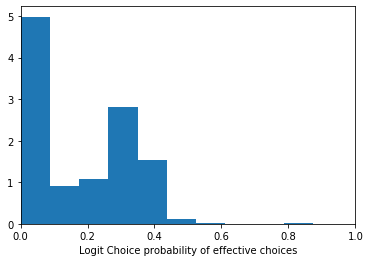

In [462]:
# (2) plot
histpath = resultpath + '/' + 'mle' 
sample.plot_fit(beta_true,histpath)

In [463]:
# 4. optimize the obj function

In [464]:
#opt.minimize(sample.loglikelihood, beta_true)
# never ends

In [465]:
x = np.array([-0.81496332, -0.03466733,  1.70092645,  0.95142027, -0.09108327])

In [466]:
# try just 2 elements
def obj(beta):
    beta_array = np.append(beta, beta_true[2:])
    return sample.loglikelihood(beta_array)

In [474]:
rranges = ( (-1,0), (, 5))
result = opt.brute(obj, rranges, finish=opt.fmin, full_output=True)

In [481]:
# original function
rranges = (slice(-1, -0.5, 0.25), slice(0, 1, 0.25), slice(-4, 4, 0.5))
result = opt.brute(sample.loglikelihood, rranges, full_output=True)

In [380]:
obj(beta)

110935.78044303173

In [399]:
sample.loglikelihood(beta_array)

110935.78044303173

Object `ld.loglikelihood` not found.


In [341]:
sample.main.head(10)

,case_id,consumer_id,year,insurer_id,provider_id,age,female,num_dependents,price,providers_available,public,price_provider_ave,ave_age_providerlastyr,age_largerthanmed,price_scale,provider_id_new
case_choice_id,,,,,,,,,,,,,,,,
0,0,0,2015,78,13,43,1,1,0.851986,2,0,0.802930,42.528302,1,1.061097,0
1,0,0,2015,78,13,43,1,1,1.532731,3,0,0.963161,36.120370,1,1.591354,0
2,0,0,2015,78,13,43,1,1,1.558725,4,0,0.942301,40.500559,1,1.654169,0
3,0,0,2015,78,13,43,1,1,1.132888,5,0,1.134914,38.166172,1,0.998215,0
4,0,0,2015,78,13,43,1,1,1.467880,6,0,1.377766,42.006418,1,1.065406,0
5,0,0,2015,78,13,43,1,1,0.971884,7,0,1.175127,42.075630,1,0.827045,0
6,0,0,2015,78,13,43,1,1,1.110956,8,0,1.196602,45.047904,0,0.928426,0
7,0,0,2015,78,13,43,1,1,0.924882,9,1,1.108957,43.917476,0,0.834011,0
8,0,0,2015,78,13,43,1,1,0.888089,13,1,0.965927,42.987092,1,0.919416,1


In [400]:
## check sample -----------------------------------------------
    # Y: binary-vector of choices, n*c-by-1
    # I: vector of consumer index, n*c-by-1
    # X: matrix of consumer choice attributes, n*c-by-m, index = consumer_id
    # beta: coefficients, m-by-1

# from sample data
# (1). X: size n*c-by-m
X = sample.main[sample.regressor]

In [16]:
# (2). I
I = sample.main[sample.case_id]
# (3). Y
Y = sample.main[sample.Y_name]

In [ ]:
# prob = sample.choice_probability(beta_true)

In [159]:
#